# Part 3 - Linear Regression

In this notebook, we will perform linear regression on a dataset we've just created in EDA. The objective is to build an appropriate linear regression model to tell that which hyperparameters are most important in helping the performance of the model.

- Stepwise regression
  
- Model evaluation 
- Model interpretation

> **Note**: this notebook uses R kernel to perform linear regression. If you don't have R kernel for Jupyter, you can just copy and paste the code into R console.

In [103]:
library(leaps)

data <- read.csv("data/eda_data.csv")
head(data, 5)

,X,learning_rate,n_estimators,max_depth,min_child_weight,subsample,gamma,alpha,lambda,colsample_bytree,scale_pos_weight,F1,learning_rate_n_estimators,learning_rate_max_depth,n_estimators_max_depth,max_depth_subsample,alpha_lambda,max_depth_min_child_weight,scale_pos_weight_max_depth,max_depth_colsample_bytree
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0,0.11861663,915,9,5,0.9216662,0.30814537,0.6040050,0.5648192,0.9611604,3,0.8080999,108.53422,1.0675497,8235,8.294996,0.3411536,45,27,8.650444
2,1,0.28570715,549,4,1,0.9465693,0.02243028,0.8713336,0.3392034,0.9257677,1,0.8185859,156.85322,1.1428286,2196,3.786277,0.2955593,4,4,3.703071
3,2,0.22227824,553,7,5,0.6238469,0.31127350,0.9989047,0.3226837,0.7836637,2,0.8047893,122.91987,1.5559477,3871,4.366929,0.3223303,35,14,5.485646
4,3,0.18361096,728,7,2,0.8768202,0.15445886,0.6077628,0.6449063,0.7007154,3,0.8044808,133.66878,1.2852767,5096,6.137742,0.3919501,14,21,4.905008
5,4,0.05524541,320,8,5,0.6559950,0.18436258,0.4047059,0.8514844,0.7481281,4,0.8071021,17.67853,0.4419632,2560,5.247960,0.3446008,40,32,5.985025


## Stepwise Regression

In this section, we will use `regsubset()` function from the `leaps` package to perform stepwise regression. The `regsubset()` function takes a formula and a data frame as input and returns the best subset of variables that can be used to explain the response variable. The function uses forward selection to select the best variables, and then uses backward elimination to remove the least significant variables.

In [104]:
model <- regsubsets(F1 ~ ., data = data, nbest = 1)
summary <- summary(model)

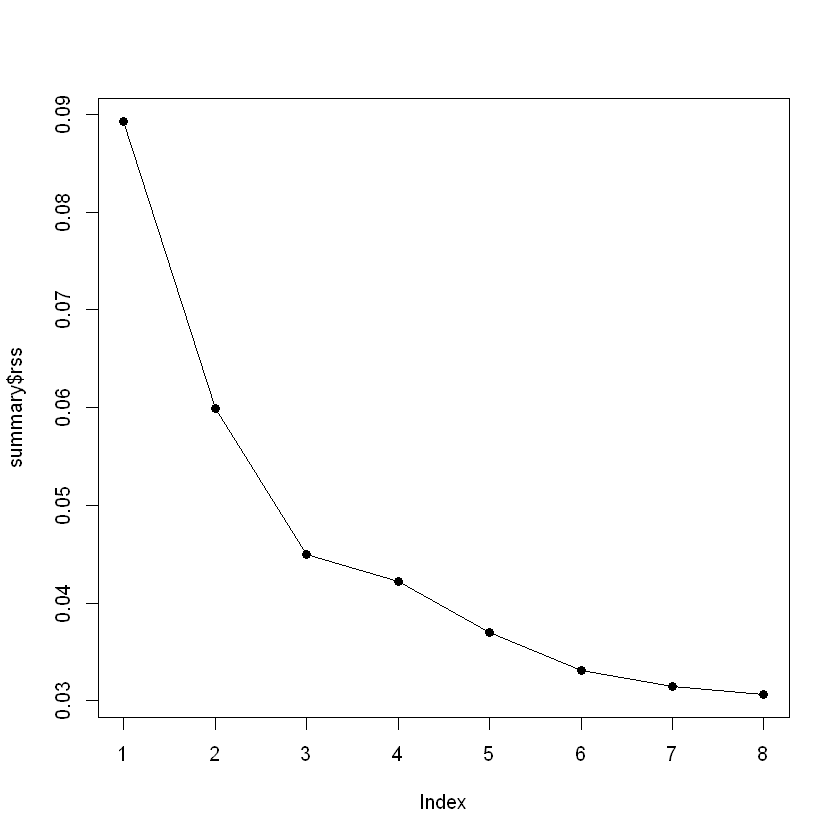

In [105]:
plot(summary$rss, type = "o", pch = 19)

In [106]:
coef(model, 6)

(Intercept)                  max_depth 
              8.523559e-01              -4.785505e-03 
          scale_pos_weight    learning_rate_max_depth 
             -9.900057e-03              -7.584990e-03 
    n_estimators_max_depth        max_depth_subsample 
             -1.446585e-06               2.230018e-03 
scale_pos_weight_max_depth 
              9.909038e-04

In [107]:
# 擬合最終模型
fit <- lm(F1 ~ max_depth + scale_pos_weight +
            learning_rate_max_depth + n_estimators_max_depth +
            max_depth_subsample + scale_pos_weight_max_depth, data = data)


summary(fit)



Call:
lm(formula = F1 ~ max_depth + scale_pos_weight + learning_rate_max_depth + 
    n_estimators_max_depth + max_depth_subsample + scale_pos_weight_max_depth, 
    data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0277656 -0.0029695 -0.0001434  0.0031102  0.0160944 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.524e-01  9.490e-04  898.14   <2e-16 ***
max_depth                  -4.786e-03  2.105e-04  -22.73   <2e-16 ***
scale_pos_weight           -9.900e-03  3.434e-04  -28.83   <2e-16 ***
learning_rate_max_depth    -7.585e-03  2.317e-04  -32.73   <2e-16 ***
n_estimators_max_depth     -1.447e-06  7.668e-08  -18.86   <2e-16 ***
max_depth_subsample         2.230e-03  1.676e-04   13.30   <2e-16 ***
scale_pos_weight_max_depth  9.909e-04  5.469e-05   18.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.004712 on 1490 degrees of 

## Model Evaluation 

Next, we will evaluate the performance of the model. First let's see how well the model fits the training data and the new testing data. We will use the mean squared error (MSE) and the coefficient of determination ($R^2$). 

In [108]:
test <- read.csv("data/testing_set.csv")

# Add interaction terms to the test data
test$learning_rate_n_estimators <- test$learning_rate * test$n_estimators
test$learning_rate_max_depth <- test$learning_rate * test$max_depth
test$n_estimators_max_depth <- test$n_estimators * test$max_depth
test$max_depth_subsample <- test$max_depth * test$subsample
test$alpha_lambda <- test$alpha * test$lambda
test$max_depth_min_child_weight <- test$max_depth * test$min_child_weight
test$scale_pos_weight_max_depth <- test$scale_pos_weight * test$max_depth
test$max_depth_colsample_bytree <- test$max_depth * test$colsample_bytree

head(test, 5)


,learning_rate,n_estimators,max_depth,min_child_weight,subsample,gamma,alpha,lambda,colsample_bytree,scale_pos_weight,F1,learning_rate_n_estimators,learning_rate_max_depth,n_estimators_max_depth,max_depth_subsample,alpha_lambda,max_depth_min_child_weight,scale_pos_weight_max_depth,max_depth_colsample_bytree
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0.13093638,616,5,4,0.6264142,0.4209490,0.02417367,0.1893696,0.6329703,3,0.8138332,80.656811,0.65468191,3080,3.132071,0.004577758,20,15,3.164852
2,0.21889410,819,3,2,0.7563092,0.3194739,0.42040201,0.4098986,0.9413152,4,0.8060458,179.274270,0.65668231,2457,2.268928,0.172322199,6,12,2.823946
3,0.01003317,131,4,4,0.7868954,0.2828157,0.32368941,0.1458626,0.9665317,4,0.7787912,1.314345,0.04013267,524,3.147582,0.047214174,16,16,3.866127
4,0.09767645,840,7,3,0.9580551,0.1535711,0.61949013,0.5623275,0.6852431,1,0.8172348,82.048215,0.68373512,5880,6.706386,0.348356349,21,7,4.796702
5,0.05255921,176,4,1,0.6442230,0.4383885,0.85976307,0.4552318,0.7894888,4,0.8052467,9.250421,0.21023683,704,2.576892,0.391391505,4,16,3.157955


Training MAE: 0.00366517 
Training R-squared: 0.7586987 


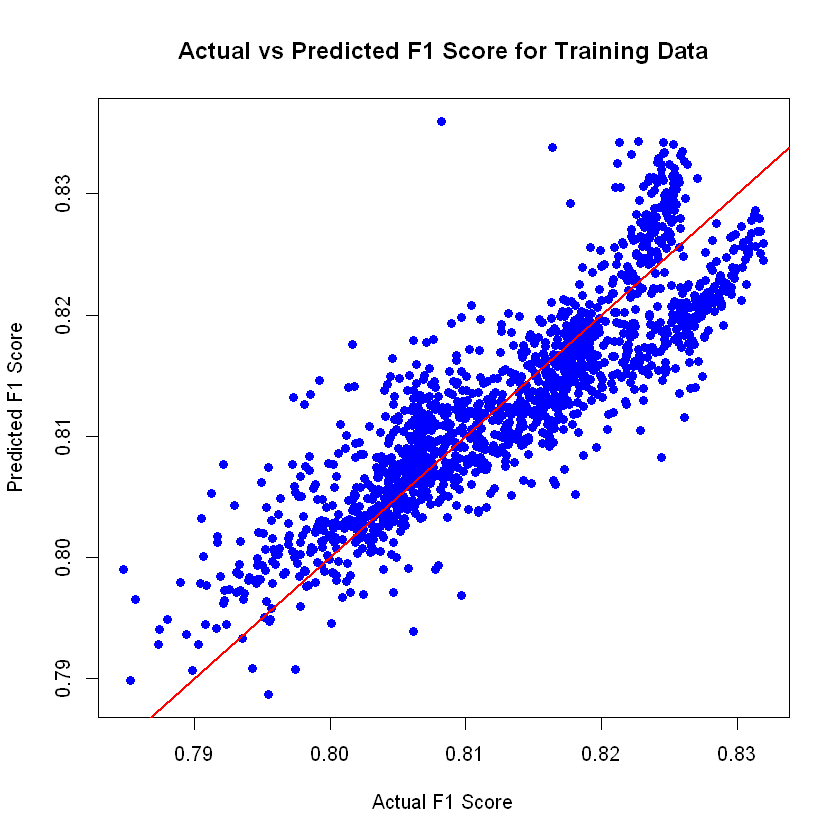

In [109]:
train_predict <- predict(fit, newdata = data)

# MSE
train_mse <- mean((train_predict - data$F1)^2)
# MAE
train_mae <- mean(abs(train_predict - data$F1))
# R-squared
train_r2 <- 1 - (train_mse / var(data$F1))

cat("Training MAE:", train_mae, "\n")
cat("Training R-squared:", train_r2, "\n")

plot(data$F1, train_predict,
     main = "Actual vs Predicted F1 Score for Training Data",
     xlab = "Actual F1 Score",
     ylab = "Predicted F1 Score",
     pch = 16, col = "blue")
abline(0, 1, col = "red", lwd = 2)


Testing MAE: 0.003582226 
Testing R-squared: 0.7445996 


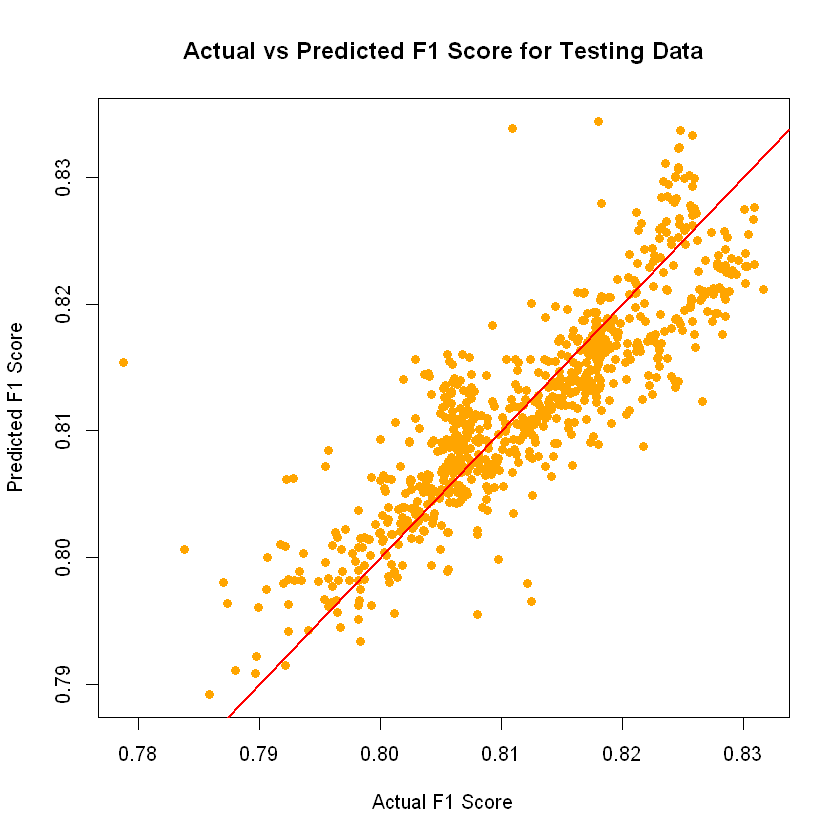

In [110]:
test_predict <- predict(fit, newdata = test)

# MSE
test_mse <- mean((test_predict - test$F1)^2)
# MAE
test_mae <- mean(abs(test_predict - test$F1))
# R-squared
test_r2 <- 1 - (test_mse / var(test$F1))

cat("Testing MAE:", test_mae, "\n")
cat("Testing R-squared:", test_r2, "\n")

plot(test$F1, test_predict,
     main = "Actual vs Predicted F1 Score for Testing Data",
     xlab = "Actual F1 Score",
     ylab = "Predicted F1 Score",
     pch = 16, col = "orange")
abline(0, 1, col = "red", lwd = 2)

### Model Assumption

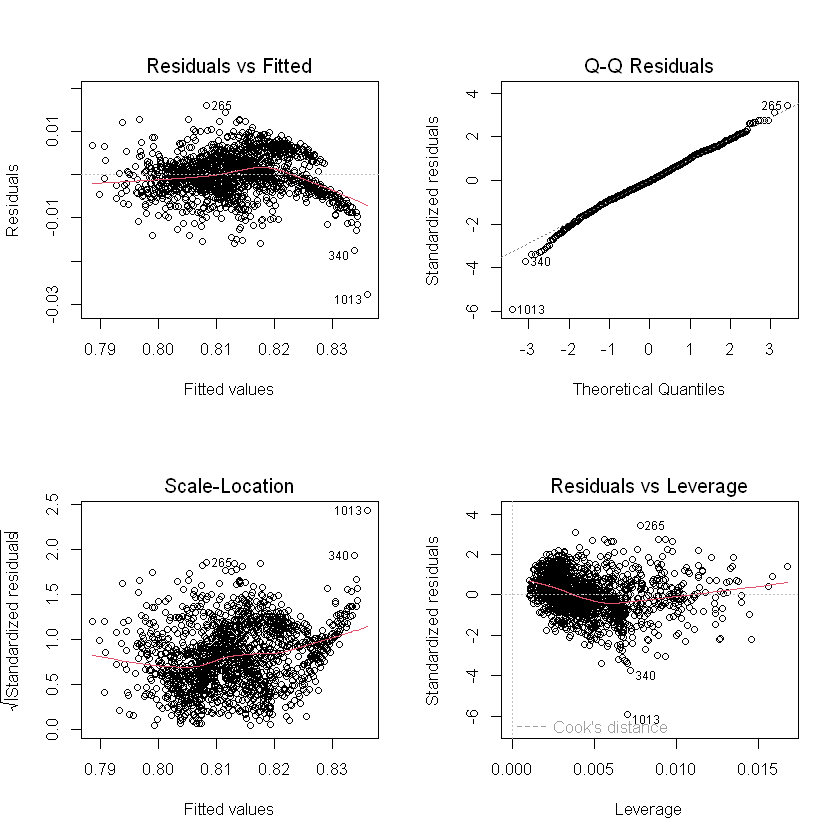

In [111]:
par(mfrow = c(2, 2))
plot(fit)

It seems like:

- There are some outliers to deal with, especially those be marked. (204, 265, 1013, 340, 1158)
  
- The normal assumption is met, i.e., the data is normally distributed.
- The equal variance assumption is not met, we have to deal with it.

In [120]:
residuals <- residuals(fit)
weights <- 1 / (residuals^2)
wls <- lm(F1 ~ max_depth + scale_pos_weight +
            learning_rate_max_depth + n_estimators_max_depth +
            max_depth_subsample + scale_pos_weight_max_depth, 
          data = data, weights = weights)
summary(wls)


Call:
lm(formula = F1 ~ max_depth + scale_pos_weight + learning_rate_max_depth + 
    n_estimators_max_depth + max_depth_subsample + scale_pos_weight_max_depth, 
    data = data, weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.1585 -0.9939 -0.8389  1.0033  1.8379 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.526e-01  1.201e-04  7097.2   <2e-16 ***
max_depth                  -4.813e-03  2.202e-05  -218.6   <2e-16 ***
scale_pos_weight           -9.966e-03  3.846e-05  -259.1   <2e-16 ***
learning_rate_max_depth    -7.571e-03  1.503e-05  -503.6   <2e-16 ***
n_estimators_max_depth     -1.449e-06  4.096e-09  -353.7   <2e-16 ***
max_depth_subsample         2.221e-03  8.796e-06   252.5   <2e-16 ***
scale_pos_weight_max_depth  1.001e-03  6.217e-06   161.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9996 on 1490 degrees of free

Testing MAE: 0.003583392 
Testing R-squared: 0.7445275 


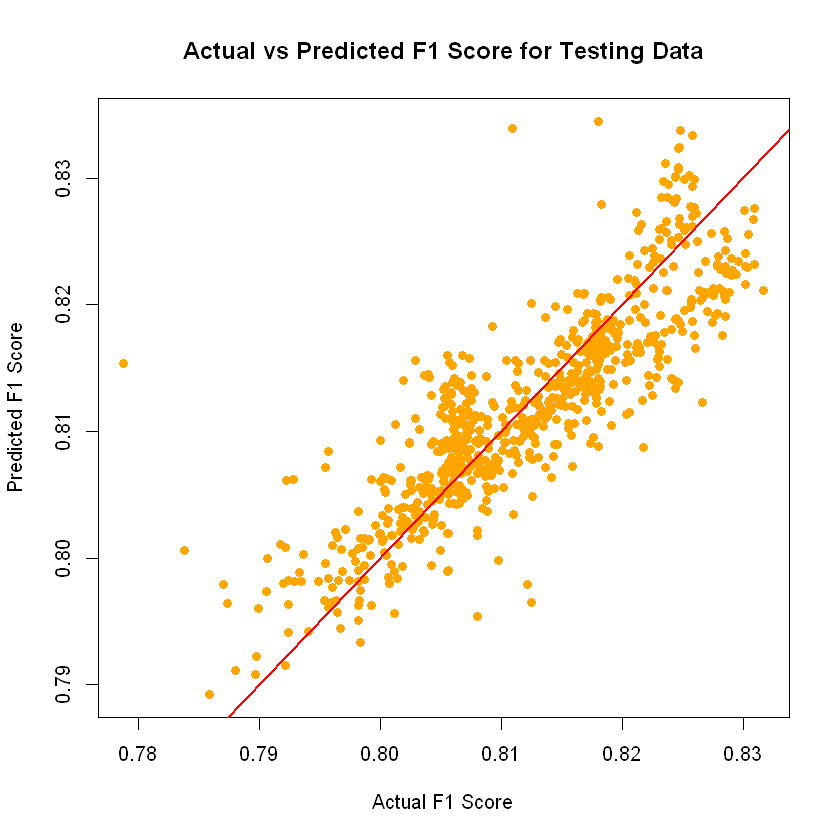

In [123]:
test_predict <- predict(wls, newdata = test)

# MSE
test_mse <- mean((test_predict - test$F1)^2)
# MAE
test_mae <- mean(abs(test_predict - test$F1))
# R-squared
test_r2 <- 1 - (test_mse / var(test$F1))

cat("Testing MAE:", test_mae, "\n")
cat("Testing R-squared:", test_r2, "\n")

plot(test$F1, test_predict,
     main = "Actual vs Predicted F1 Score for Testing Data",
     xlab = "Actual F1 Score",
     ylab = "Predicted F1 Score",
     pch = 16, col = "orange")
abline(0, 1, col = "red", lwd = 2)

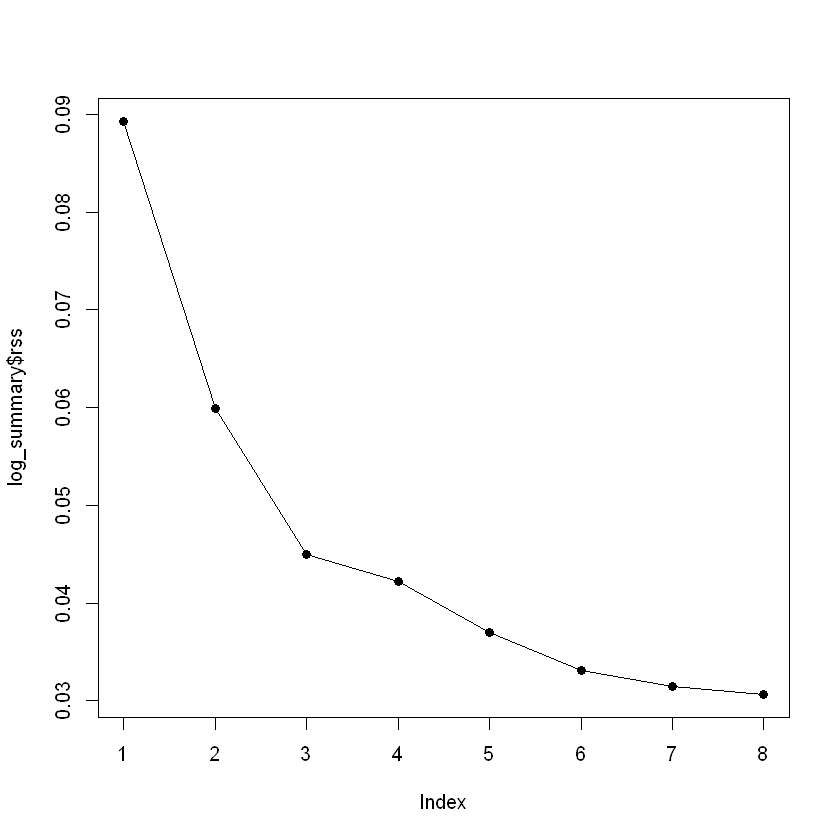

In [ ]:
log_data <- data

log_data$F1 <- log(log_data$F1)

# remove outliers by row
log_data <- log_data[-c(204, 265, 340, 1013, 1158)]

log_model <- regsubsets(F1 ~ ., data = data, nbest = 1)
log_summary <- summary(log_model)
plot(log_summary$rss, type = "o", pch = 19)


In [114]:
coef(log_model, 6)

(Intercept)                  max_depth 
              8.523559e-01              -4.785505e-03 
          scale_pos_weight    learning_rate_max_depth 
             -9.900057e-03              -7.584990e-03 
    n_estimators_max_depth        max_depth_subsample 
             -1.446585e-06               2.230018e-03 
scale_pos_weight_max_depth 
              9.909038e-04

In [117]:
fit2 <- lm(F1 ~ max_depth + scale_pos_weight +
             learning_rate_max_depth + n_estimators_max_depth +
             max_depth_subsample + scale_pos_weight_max_depth, data = log_data)


summary(fit2)


Call:
lm(formula = F1 ~ max_depth + scale_pos_weight + learning_rate_max_depth + 
    n_estimators_max_depth + max_depth_subsample + scale_pos_weight_max_depth, 
    data = log_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034107 -0.003656 -0.000173  0.003832  0.019813 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -1.588e-01  1.169e-03 -135.78   <2e-16 ***
max_depth                  -5.881e-03  2.594e-04  -22.68   <2e-16 ***
scale_pos_weight           -1.214e-02  4.231e-04  -28.70   <2e-16 ***
learning_rate_max_depth    -9.370e-03  2.855e-04  -32.82   <2e-16 ***
n_estimators_max_depth     -1.788e-06  9.448e-08  -18.93   <2e-16 ***
max_depth_subsample         2.759e-03  2.065e-04   13.36   <2e-16 ***
scale_pos_weight_max_depth  1.215e-03  6.738e-05   18.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005805 on 1490 degrees of freedo

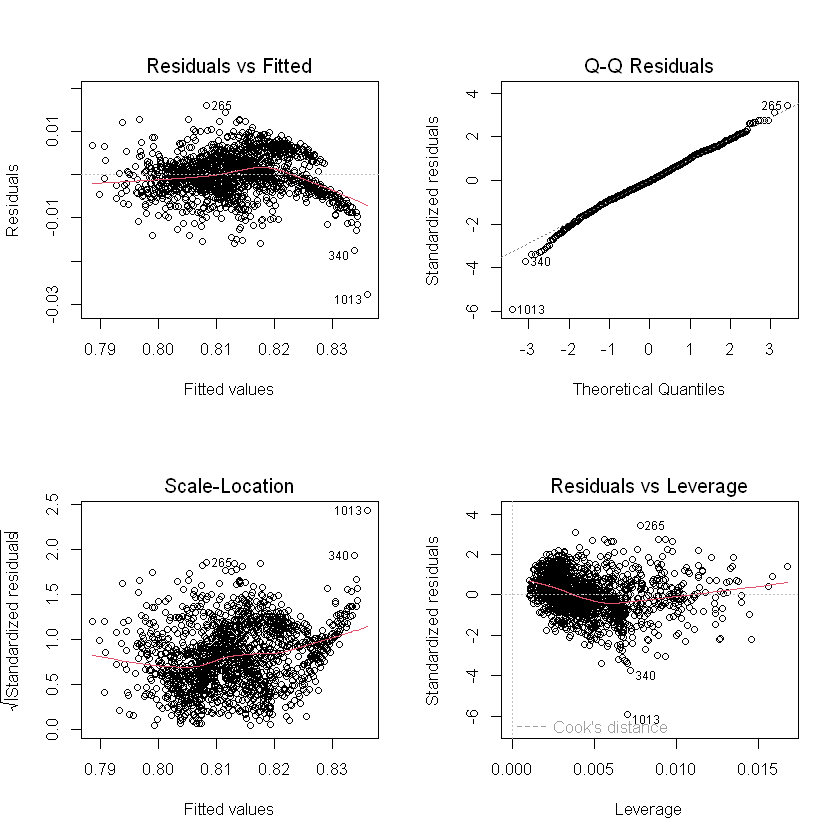

In [118]:
par(mfrow = c(2, 2))
plot(fit)